In [1]:
import pandas as pd
import numpy as np



file_path = 'Gym_membership numbers.csv'
hd = pd.read_csv(file_path)

hd.head()

,0,gender,Age,ab_type,visit_per_week,group_lesson,num_fav_lessons,avg_time_in_gym,drink,favDrink,personalTraining,ptrainer,Trainer,suana
0,1,0,27,1,4,1,3,116,0,0,0,0,1,1
1,2,0,47,0,3,0,0,48,0,0,1,3,0,0
2,3,1,41,1,1,1,1,123,1,2,1,1,0,0
3,4,1,44,1,3,0,0,99,1,1,1,1,0,1
4,5,1,44,0,2,1,3,50,0,0,1,1,0,0


In [2]:
hd.describe()

,0,gender,Age,ab_type,visit_per_week,group_lesson,num_fav_lessons,avg_time_in_gym,drink,favDrink,personalTraining,ptrainer,Trainer,suana
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.497000,30.604000,0.493000,2.682000,0.503000,1.003000,105.260000,0.496000,0.719000,0.518000,1.277000,0.482000,0.493000
std,288.819436,0.500241,10.817958,0.500201,1.241941,0.500241,1.153396,43.557177,0.500234,0.805412,0.499926,1.468478,0.499926,0.500201
min,1.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,21.000000,0.000000,2.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,0.000000,30.000000,0.000000,3.000000,1.000000,1.000000,104.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,750.250000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,143.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,1000.000000,1.000000,49.000000,1.000000,5.000000,1.000000,3.000000,180.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000


In [3]:
null_values = hd.isnull().sum()
null_values

0                   0
gender              0
Age                 0
ab_type             0
visit_per_week      0
group_lesson        0
num_fav_lessons     0
avg_time_in_gym     0
drink               0
favDrink            0
personalTraining    0
ptrainer            0
Trainer             0
suana               0
dtype: int64

In [11]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

X = hd.drop(columns=['avg_time_in_gym'])
y = hd['avg_time_in_gym']

# Normalizing features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Results dictionary to store performance metrics for each model
results = {
    'Regression Tree': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Ridge Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Lasso Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Principal Component Regression (PCR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Regression Splines': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Support Vector Regression (SVR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []}
}

num_features = X.shape[1]

# Running the models multiple times to compute average metrics
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=None)

    # Defining models
    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression (SVR)': SVR()
    }

    # Fitting models and computing metrics
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        results[model_name]['MSE'].append(mse)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['RSE'].append(rse)
        results[model_name]['RSS'].append(rss)
        results[model_name]['R^2'].append(r2)

# Calculating average results
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(average_results).T
results_df

,MSE,RMSE,RSE,RSS,R^2
Regression Tree,3789.261000,61.516196,63.003849,1.136778e+06,-1.024054
Ridge Regression,1932.061019,43.942615,45.005284,5.796183e+05,-0.030274
Lasso Regression,1901.332112,43.589429,44.643557,5.703996e+05,-0.013564
Principal Component Regression (PCR),1932.297891,43.945326,45.008061,5.796894e+05,-0.030404
Regression Splines,4248.065602,65.114677,66.689352,1.274420e+06,-1.266577
Support Vector Regression (SVR),1909.063415,43.674841,44.731035,5.727190e+05,-0.017445


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 100}
Ridge Regression - Metrics: {'MSE': 2108.8539475938705, 'RMSE': 45.92225982673185, 'RSE': 47.0328030252626, 'RSS': 632656.1842781611, 'R²': -0.02365066628923107}



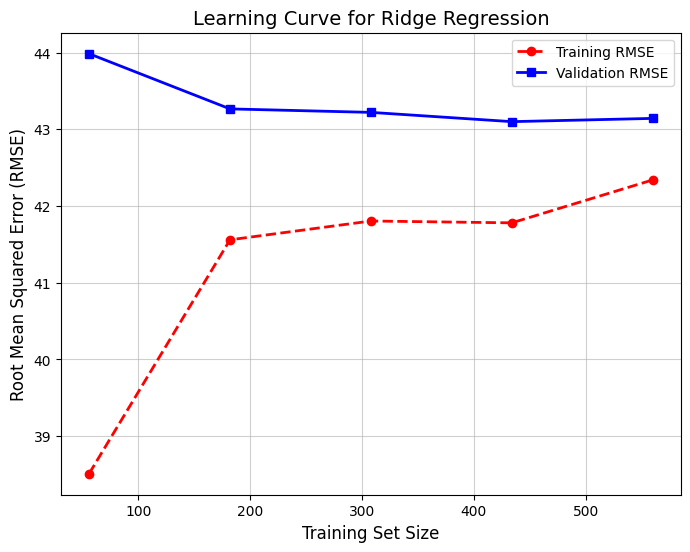

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 10}
Lasso Regression - Metrics: {'MSE': 2060.2176544217687, 'RMSE': 45.38962055824843, 'RSE': 46.487282881162066, 'RSS': 618065.2963265306, 'R²': -4.2310685342439314e-05}



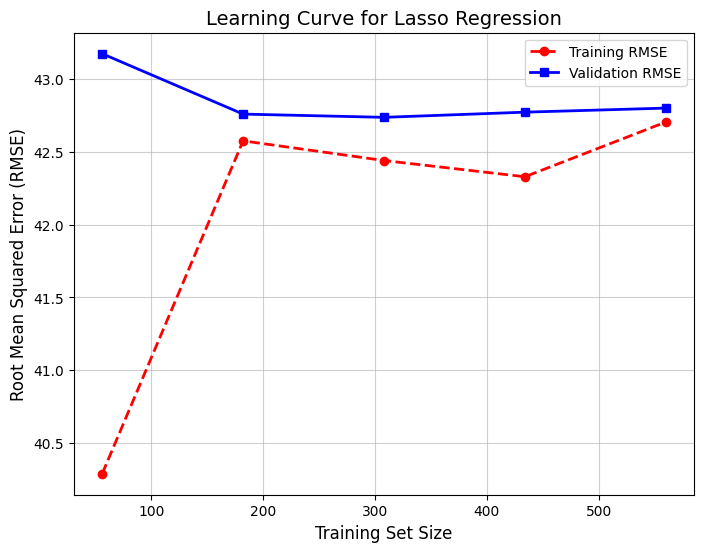

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 2}
Principal Component Regression (PCR) - Metrics: {'MSE': 2065.1508810608243, 'RMSE': 45.44393117965065, 'RSE': 46.54290690245867, 'RSS': 619545.2643182473, 'R²': -0.0024369292134709397}



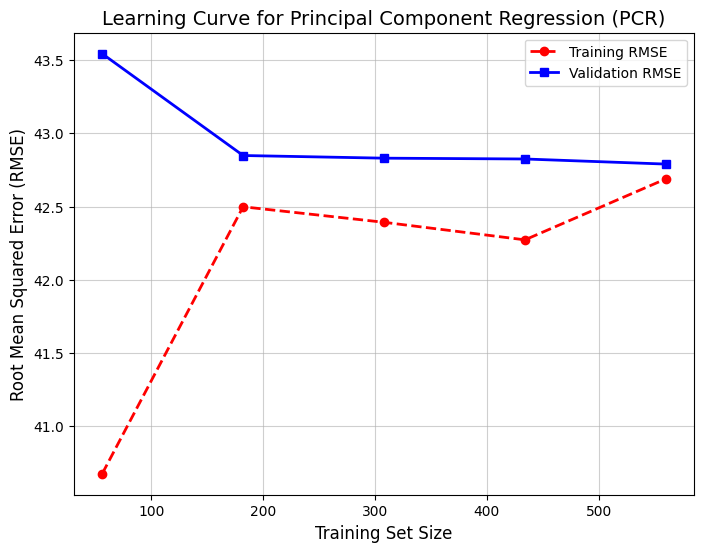

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 2}
Regression Splines - Metrics: {'MSE': 2191.164870605469, 'RMSE': 46.80988005331213, 'RSE': 47.94188867208191, 'RSS': 657349.4611816406, 'R²': -0.06360489416728732}



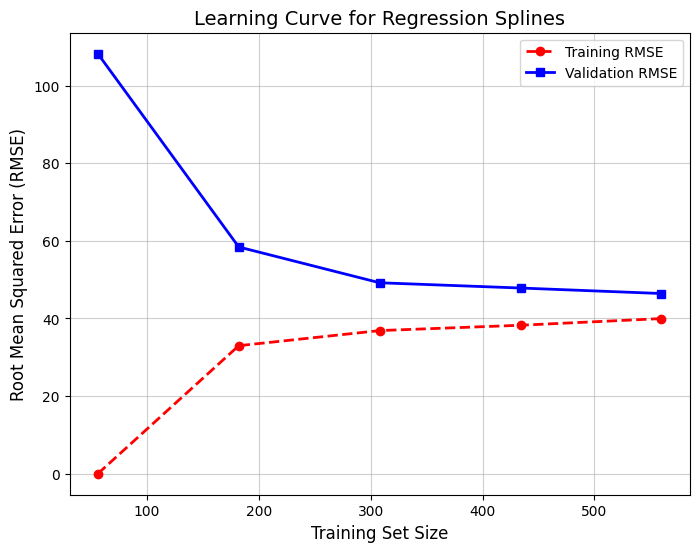

Running GridSearchCV for Regression Tree...
Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 20}
Regression Tree - Metrics: {'MSE': 2126.9412563262304, 'RMSE': 46.11877336103195, 'RSE': 47.234068868568386, 'RSS': 638082.3768978692, 'R²': -0.032430357104891616}



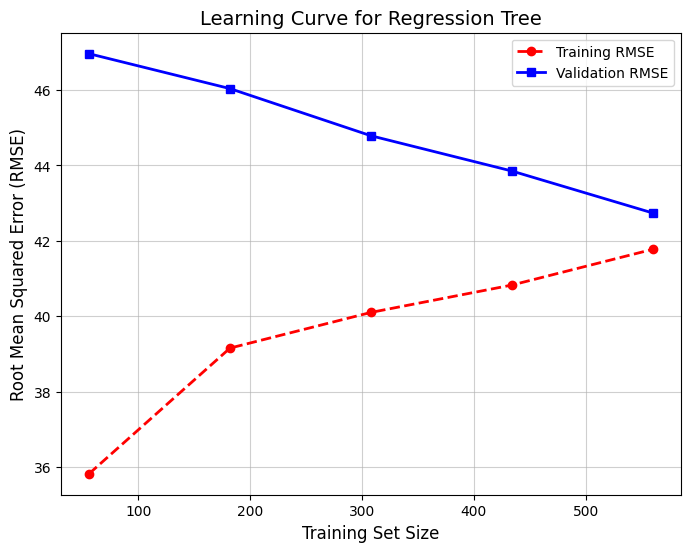

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}
Support Vector Regression (SVR) - Metrics: {'MSE': 2101.123633844375, 'RMSE': 45.83801516039252, 'RSE': 46.94652106063768, 'RSS': 630337.0901533125, 'R²': -0.019898324487977126}



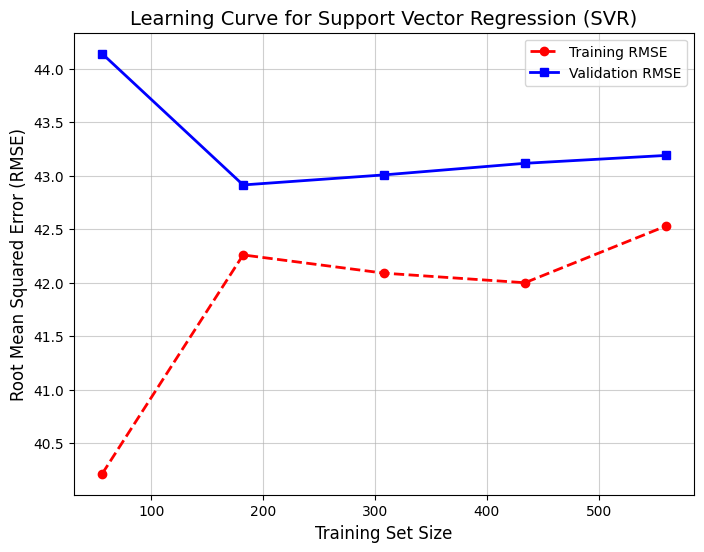


Model Performance Metrics:
                                              MSE       RMSE        RSE  \
Ridge Regression                      2108.853948  45.922260  47.032803   
Lasso Regression                      2060.217654  45.389621  46.487283   
Principal Component Regression (PCR)  2065.150881  45.443931  46.542907   
Regression Splines                    2191.164871  46.809880  47.941889   
Regression Tree                       2126.941256  46.118773  47.234069   
Support Vector Regression (SVR)       2101.123634  45.838015  46.946521   

                                                RSS        R²  
Ridge Regression                      632656.184278 -0.023651  
Lasso Regression                      618065.296327 -0.000042  
Principal Component Regression (PCR)  619545.264318 -0.002437  
Regression Splines                    657349.461182 -0.063605  
Regression Tree                       638082.376898 -0.032430  
Support Vector Regression (SVR)       630337.090153 -0.019898 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3]},
    'Regression Tree': {
        'decisiontreeregressor__max_depth': [3, 4, 5],
        'decisiontreeregressor__min_samples_split': [10, 15, 20],
        'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
    },
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1], 'svr__kernel': ['linear']}
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, 'r--o', label="Training RMSE", linewidth=2)
    plt.plot(train_sizes, test_rmse, 'b-s', label="Validation RMSE", linewidth=2)
    plt.title(f"Learning Curve for {model_name}", fontsize=14)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.6)
    plt.show()

# Dictionary to store results
results = {}
best_parameters = {}

# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Define the model pipeline
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters
    best_parameters[model_name] = grid_search.best_params_

    # Predict on the test set using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Display best parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")



In [16]:
results_df

,MSE,RMSE,RSE,RSS,R²
Ridge Regression,2108.853948,45.922260,47.032803,632656.184278,-0.023651
Lasso Regression,2060.217654,45.389621,46.487283,618065.296327,-0.000042
Principal Component Regression (PCR),2065.150881,45.443931,46.542907,619545.264318,-0.002437
Regression Splines,2191.164871,46.809880,47.941889,657349.461182,-0.063605
Regression Tree,2126.941256,46.118773,47.234069,638082.376898,-0.032430
Support Vector Regression (SVR),2101.123634,45.838015,46.946521,630337.090153,-0.019898
